In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing
from sklearn import tree
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
plt.style.use("ggplot")

In [2]:
try:
    df = pd.read_excel("flights.xlsx")
    print("File loaded")
except Exception:
    print("Error reading file")

File loaded


In [3]:
#יבוא של הדטה 

In [4]:
data = pd.read_csv('flights.csv')
df=data

# Classification

## I. Business Understanding

**checklist for EDA**
* [ ] read data dictionary and make some assumptions about the data
* [ ] import data
* [ ] check the shape
* [ ] data head
* [ ] view info for dtype and missing value
* [ ] check/make sure for missing value 
* [ ] check statistical info 
* [ ] data integrity 
* [ ] divide columns dtypes and check distribution + target
* [ ] vizualisation for outliers only if needed 
* [ ] write insight based on step 1 

**Question 1**: Is it possible to predict or estimate the flight price of a domestic flight in India based on route, airline
or date?

## II. Data Understanding

In [5]:
df.shape

(13354, 11)

In [6]:
df.columns

Index(['Airline', 'Date', 'Source', 'Destination', 'Route', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

In [7]:
# בדיקת ערכים חזרים + בדיקת דטה טייפ של העמודות

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date             13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            13354 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [9]:
df.sample(5)

,Airline,Date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2524,SpiceJet,18/06/2019,Banglore,Delhi,"BLR , DEL",21:10,00:05 19 Jun,2h 55m,non-stop,No info,3971.000000
2137,Jet Airways,9/05/2019,Kolkata,Banglore,"CCU , DEL , BLR",09:35,23:35,14h,1 stop,No info,12121.000000
10596,Jet Airways,1/06/2019,Delhi,Cochin,"DEL , BOM , COK",10:00,12:35 02 Jun,26h 35m,1 stop,In-flight meal not included,10262.000000
12715,Jet Airways,15/05/2019,Mumbai,Hyderabad,"BOM , HYD",07:05,08:30,1h 25m,non-stop,No info,2124.333335
2483,Jet Airways,21/05/2019,Delhi,Cochin,"DEL , BOM , COK",22:50,04:25 22 May,5h 35m,1 stop,In-flight meal not included,12898.000000


In [10]:
# סטטיסטיקות על עמודות נומריות(מספרים)

In [11]:
df.describe()

,Price
count,13354.000000
mean,8190.637282
std,4648.401101
min,3.065912
25%,4804.000000
50%,7308.000000
75%,11087.000000
max,79512.000000


In [12]:
#בדיקת ערכים חסרים 

In [13]:
df.isna().sum()

Airline            0
Date               0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
#זריקת שורות עם ערכים חסרים
#הסיבה שהחלטתי לזרוק את המידע ולא למלא אותו היא כי ישנו מעט מאוד מידע חסר וזריקת המידע איננה משםיעה על הדטה 

In [15]:
df.dropna(inplace=True)

In [16]:
#ווידוא כי אכן כל הדטה החסר טופל וכי ניתן להמשיך הלאה- במידה ולא הייתי מקבל טעות 

In [17]:
assert(df.isna().sum().sum()==0)

בדיקת סכימת הערכים הריקים, אם לא היה סכום השווה ל0, היה מחזיר שגיאה

In [18]:
df.columns

Index(['Airline', 'Date', 'Source', 'Destination', 'Route', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

In [19]:
#בידקת הצפלגות של עמודות שונות בכדי לקבל מעט אינדיקציה ומידע על העמודות והאם נדרש לבצע תהליך כמו איחוד שמות דומים על העמודה 

In [20]:
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [21]:
df['Additional_Info'].value_counts()

No info                         10492
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
Red-eye flight                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

In [22]:
#בדיקת התפלגות של עמודת ה״מחיר״,בדרך זו ניתן לראות כי ישנו זמן ימין(עם ערכים חרידים) כמו כן ניתן לראות את טווח המחירים 

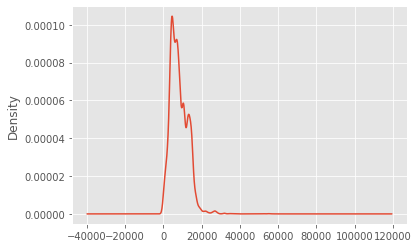

In [23]:
df['Price'].plot(kind='kde');

In [24]:
# בדיקת פופולריות של היעדים

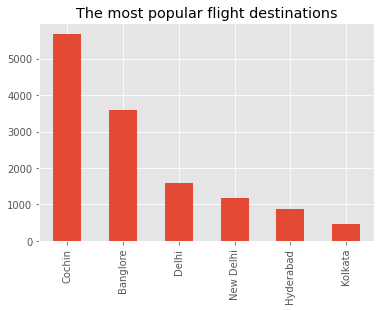

In [25]:
df["Destination"].value_counts().plot(kind="bar", title='The most popular flight destinations');

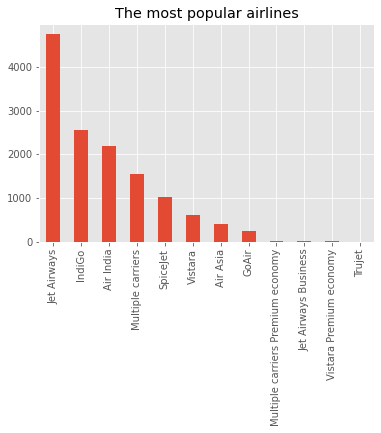

In [26]:
df["Airline"].value_counts().plot(kind="bar", title='The most popular airlines');

In [27]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [28]:
# בודק כי רק ערכים חיוביים קיימים במחרים - לא יכול להיות מחיר כרטיס שלילי 

In [29]:
assert(df['Price'].any()>=0)

**checklist for EDA**
* [x] read data dictionary and make some assumptions about the data
* [x] import data
* [x] check the shape
* [x] data head
* [x] view info for dtype and missing value
* [x] check/make sure for missing value 
* [x] check statistical info 
* [x] data integrity 
* [x] write insight based on step 1 


## INSIGHTS

### עד כה ניתן ליראות כי היו ערכים חסרים וטופםלו
### מצאנו כי ישנם ערכים בחברות התעופה שניתן לאחד אותם 
### כמו כן ביעדים ראינו כי יש צורך לאחד יעדים דומים 
### נדרשת המרה של עמודת התאריך לטייפ מתאים (כרגע מדובר באובייקט)


## שלב ההמרות!!!

In [30]:
# המרת עמודת משך זמן טיסה לדקות מכיוון שמופיעות דקות ושעות יחד 

In [31]:
h = df['Duration'].str.extract('(\d+)h', expand=False).astype(float) * 60
m = df['Duration'].str.extract('(\d+)m', expand=False).astype(float)
h.add(m, fill_value=0).astype(int).astype(str) 

df['Minutes Duration'] = h.add(m, fill_value=0).astype(int).astype(str) 

In [32]:
df["Source"].value_counts()

Delhi       5681
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [33]:
#איחוד ערכים דומים כמו שהוזכר בשלב התובנות

In [34]:
df.loc[df["Airline"] == "Jet Airways Business", 'Airline']='Jet Airways'
df.loc[df["Airline"] == "Multiple carriers Premium economy", 'Airline']='Multiple carriers'
df.loc[df["Airline"] == "Vistara Premium economy", 'Airline']='Vistara'

In [35]:
df.loc[df["Destination"] == "New Delhi", 'Destination']='Delhi'

In [36]:
df['Destination'].value_counts()

Cochin       5681
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [37]:
df.loc[df["Additional_Info"] == "No Info", 'Additional_Info']='No info'

In [38]:
# עבודה על עמודות הזמן

In [39]:
df['Arrival_Time'] = [i.split()[0] for i in df['Arrival_Time']]

In [40]:
#המרת עמודת הזמן מאובייקט לטייפ מתאים (דייטטיים)ץ

In [41]:
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [42]:
#משיכת שנה חודש ויום מעמודת התאריך

In [43]:
df['year'] = df.Date.dt.year
df['month'] = df.Date.dt.month
df['day'] = df.Date.dt.day
df['day week'] = df.Date.dt.weekday

In [44]:
#לאחר הוספת עמודות ניתן למחוק את עמודת הזמן שמיוצגת בעמודות החדשות


In [45]:
df.drop(['year', 'Date', 'Duration'], axis=1, inplace=True)

In [46]:
# המרת עמודת ״עצירות״ לערכים מספריים

In [47]:
stop_value_dict = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
df['Total_Stops'] = df['Total_Stops'].map(lambda x: stop_value_dict[x])

In [48]:
# ויזואליזציה
# בכדי לקבל מעט הבנה על איך המחיר משתנה יצרתי גרפים שונים של המחירים אל מול עמודות שונות 

In [49]:
# גרף של מחיר לפי חברת תעופה - ניתן לראות כי ספייסג׳ט הינה חברת התעופה הזולה כאשר ארוואי  יקרה יותר עם ערכים חריגים

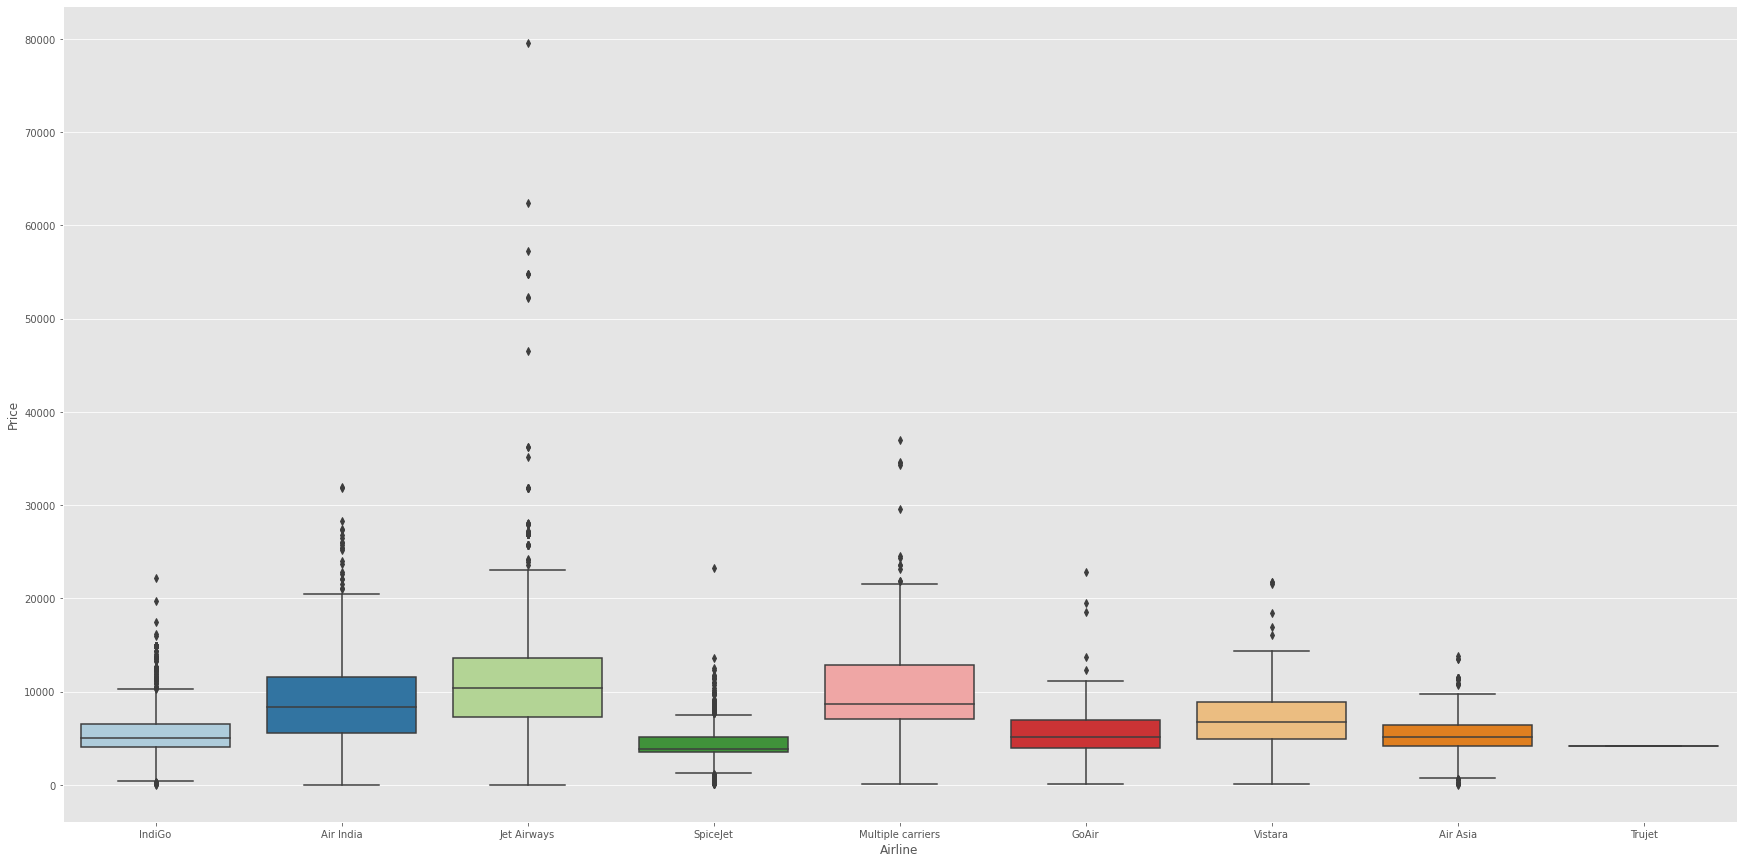

In [50]:
column_name = 'Airline'
target = 'Price'
ig, ax = plt.subplots(figsize=(30, 15))
sns.boxplot(ax=ax,
                x=column_name,
                y=target,
                data=df,
                palette="Paired");

In [51]:
#גרך של מחיר הטיסות לפי חברות התעופה בהתאם לחודשים 
#ניתן לראות כי חודש 6 הינו חודדש מעט יותר יציב לעות חודש 3 אשר הינו חודש עם יותר תנועדיות ומעט יותר יקר- ניתן לצפות כי שורות בעלות חודש 3 יהיו במחירים הגבוים 

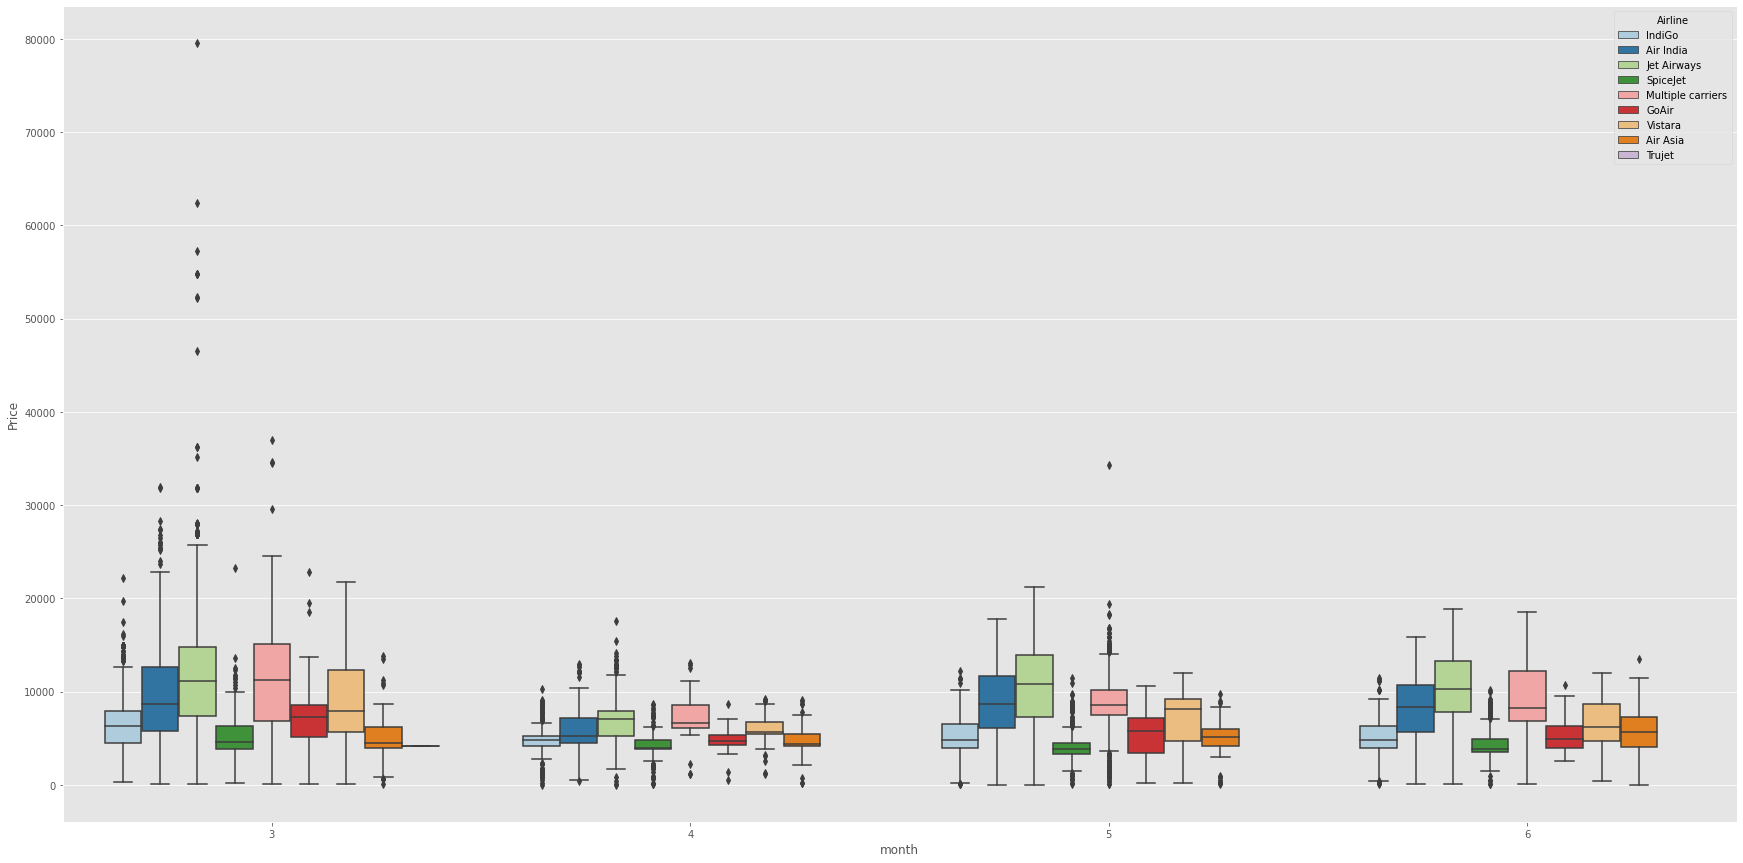

In [52]:
column_name = 'month'
target = 'Price'
ig, ax = plt.subplots(figsize=(30, 15))
sns.boxplot(ax=ax,
                x=column_name,
                y=target,
                data=df,
                hue = 'Airline',
                palette="Paired");

In [53]:
#גרף המראה יעדים לפי ומחירים לפי חברות תעופה
#ניתן לראות כי ישנם יעדים יקרים יותר ויקרים פחות כמו כן ניתן לראות כי ישנן חברות תעופה שאינן מגיעות לכל היעדים 
#דוגמת קלךקוטא אשר לא כל חברות התעופה בעלות טיסות ליעד זה כמו כן מדובר ביעד יציבים  ולכן ליעד זה נצפה לקבל את המחירים הזולים או הבינוניים 

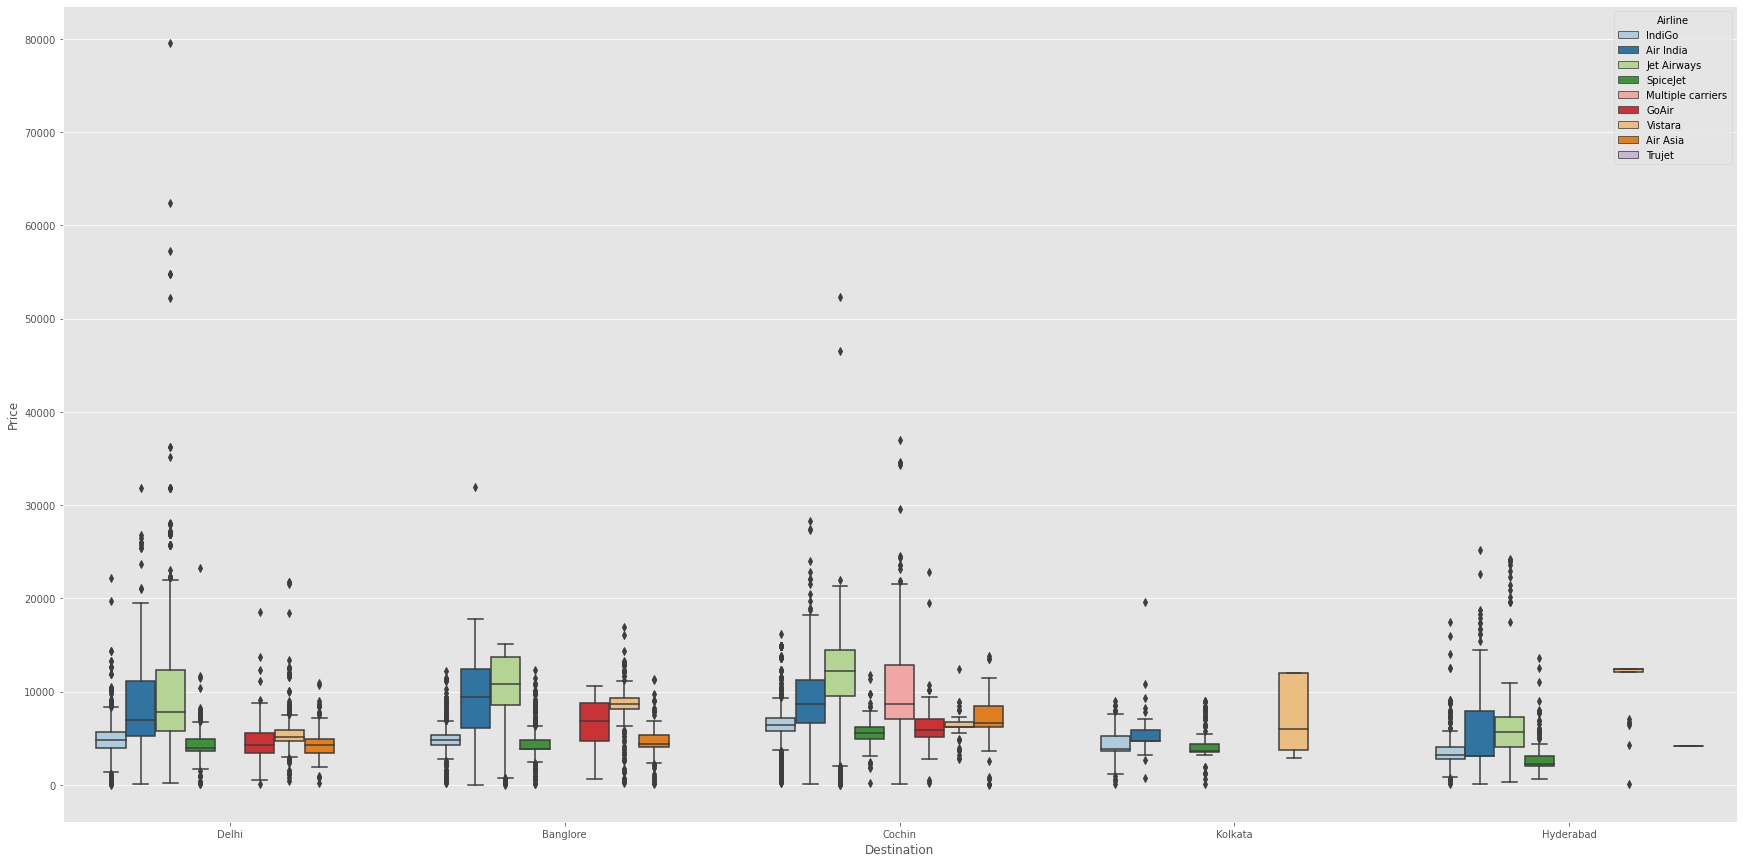

In [54]:
column_name = 'Destination'
target = 'Price'
ig, ax = plt.subplots(figsize=(30, 15))
sns.boxplot(ax=ax,
                x=column_name,
                y=target,
                data=df,
                hue = 'Airline',
                palette="Paired");

In [55]:
#גרף של מחיר ביעדים לפי חודשים
#ניתן לראות כי חודש רביעי הינו החודש הכי זול מול כל היעדים ונצפה לקבל את המחירים הזול עבור חודש אפריל .
#כמו כן חודש מרץ הינו החודש החזק יותר כי המחירים גבוהים יותר ועם יותר תנועדיות ויערכים חריגים

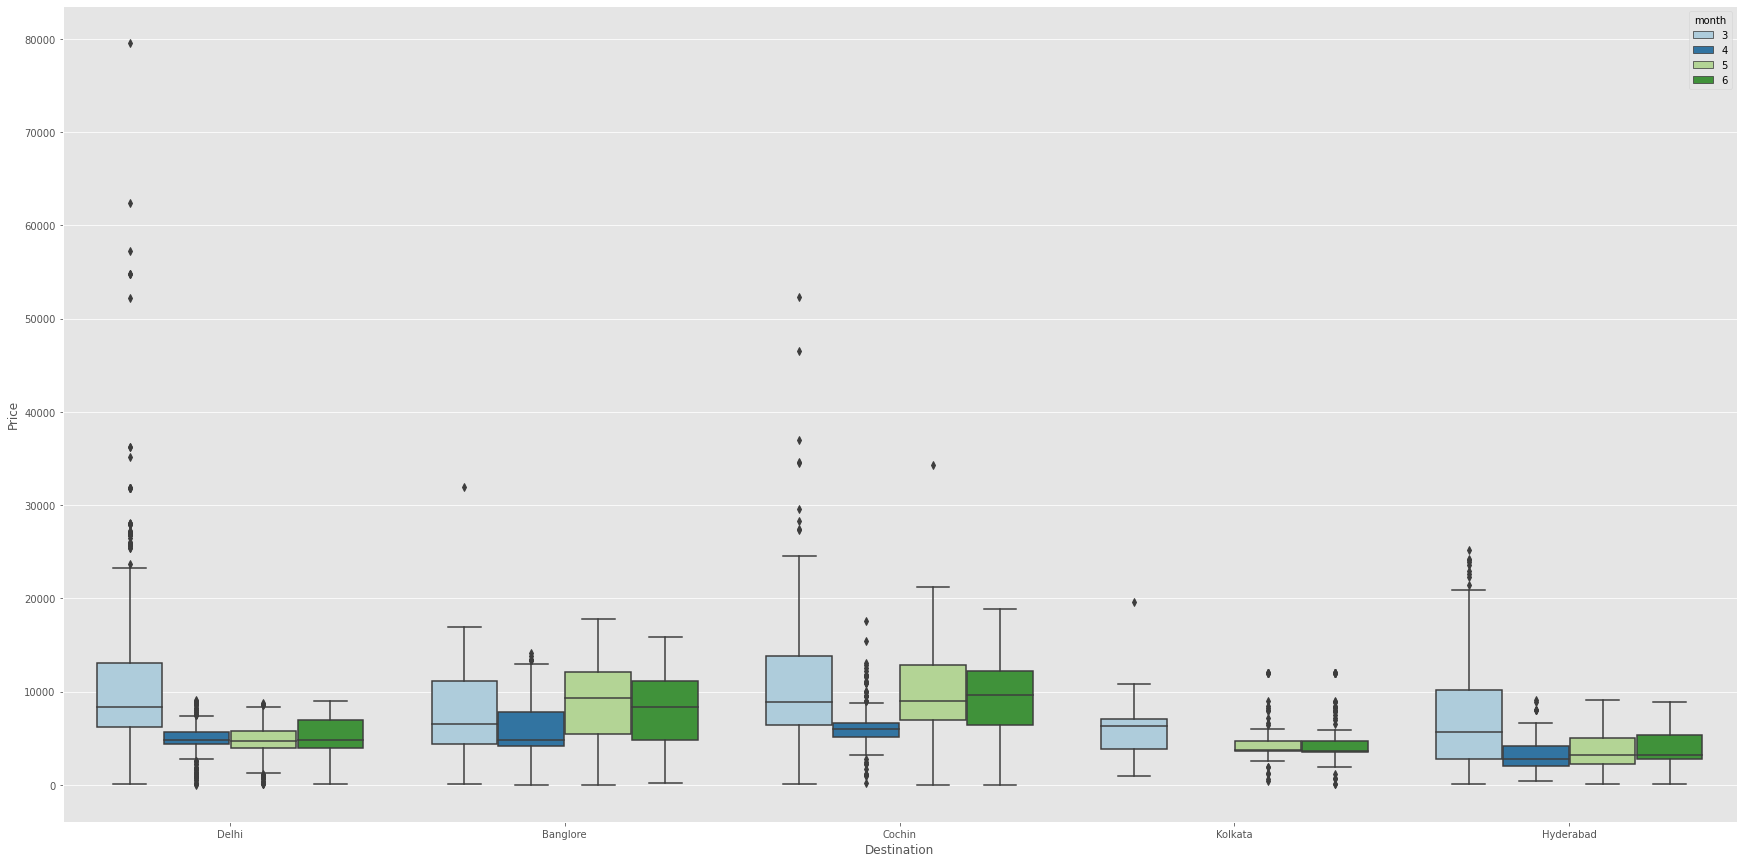

In [56]:
column_name = 'Destination'
target = 'Price'
ig, ax = plt.subplots(figsize=(30, 15))
sns.boxplot(ax=ax,
                x=column_name,
                y=target,
                data=df,
                hue = 'month',
                palette="Paired");

In [57]:
# גרף שהיה נראה ליל חשוב מאוד הינו גרף של מחירי הטיסה אל מול כמות העצירות עבוד היעדים השונים
#ניתן לראות כי קלקוטא בעל קו ישיר בלבד וכי המחיר נמוך
# באופן מפתיע ניתן גם לראות כי טיסות בעלות 0 עצירות זולות לכל יעד וכל השאר דיי שוות למעט היעד האחרון איידרבאד

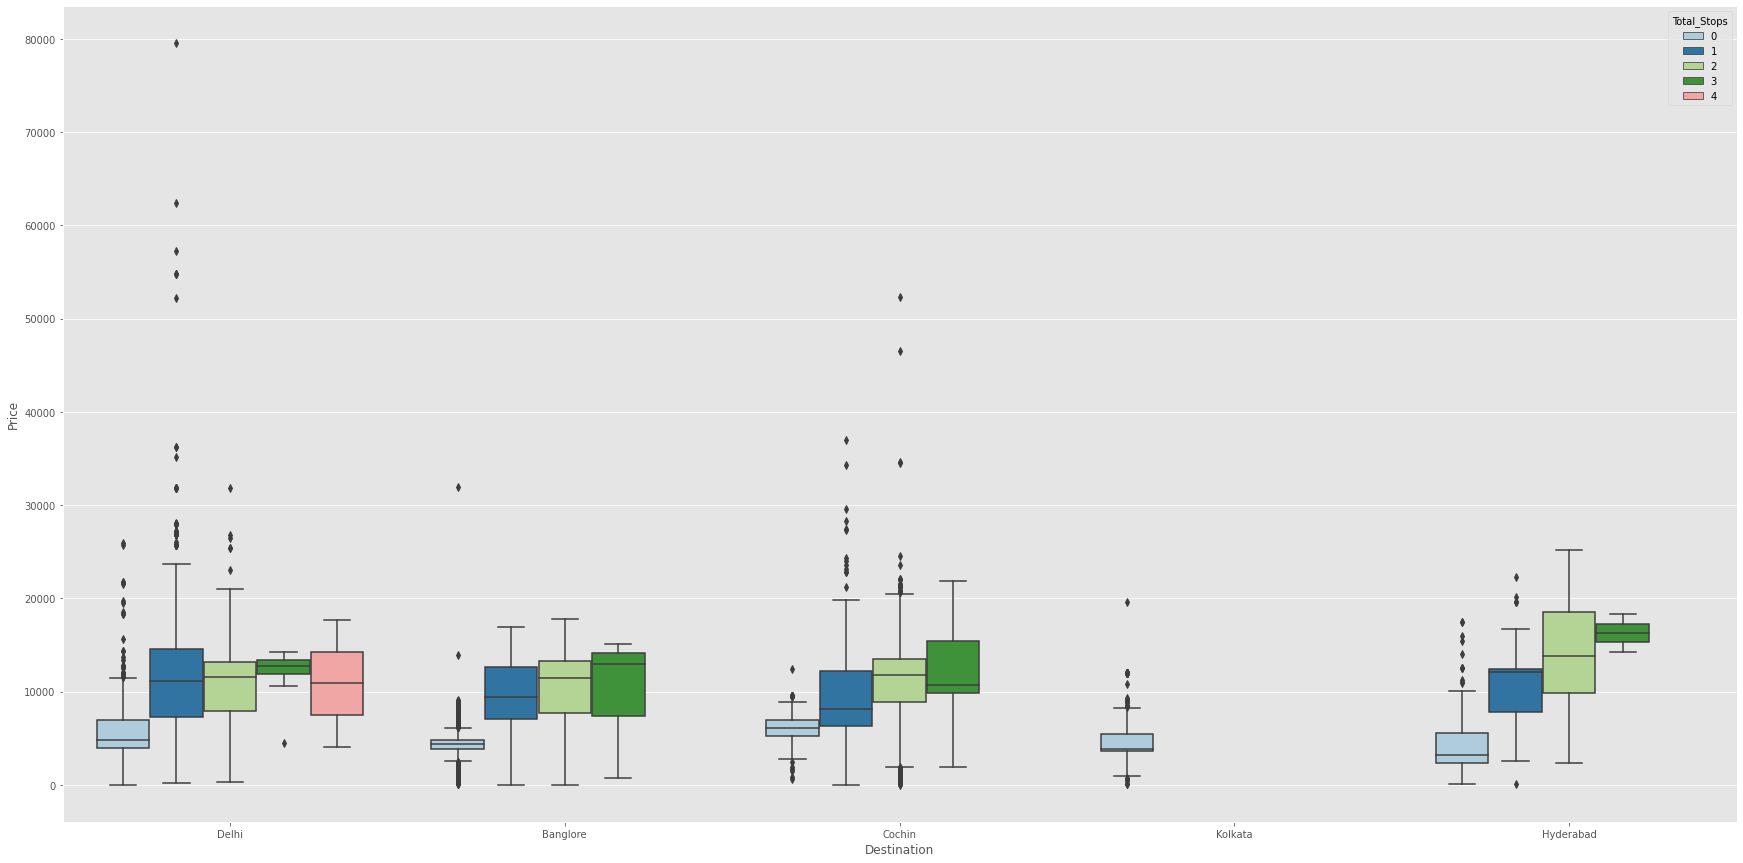

In [58]:
column_name = 'Destination'
target = 'Price'
ig, ax = plt.subplots(figsize=(30, 15))
sns.boxplot(ax=ax,
                x=column_name,
                y=target,
                data=df,
                hue = 'Total_Stops',
                palette="Paired");

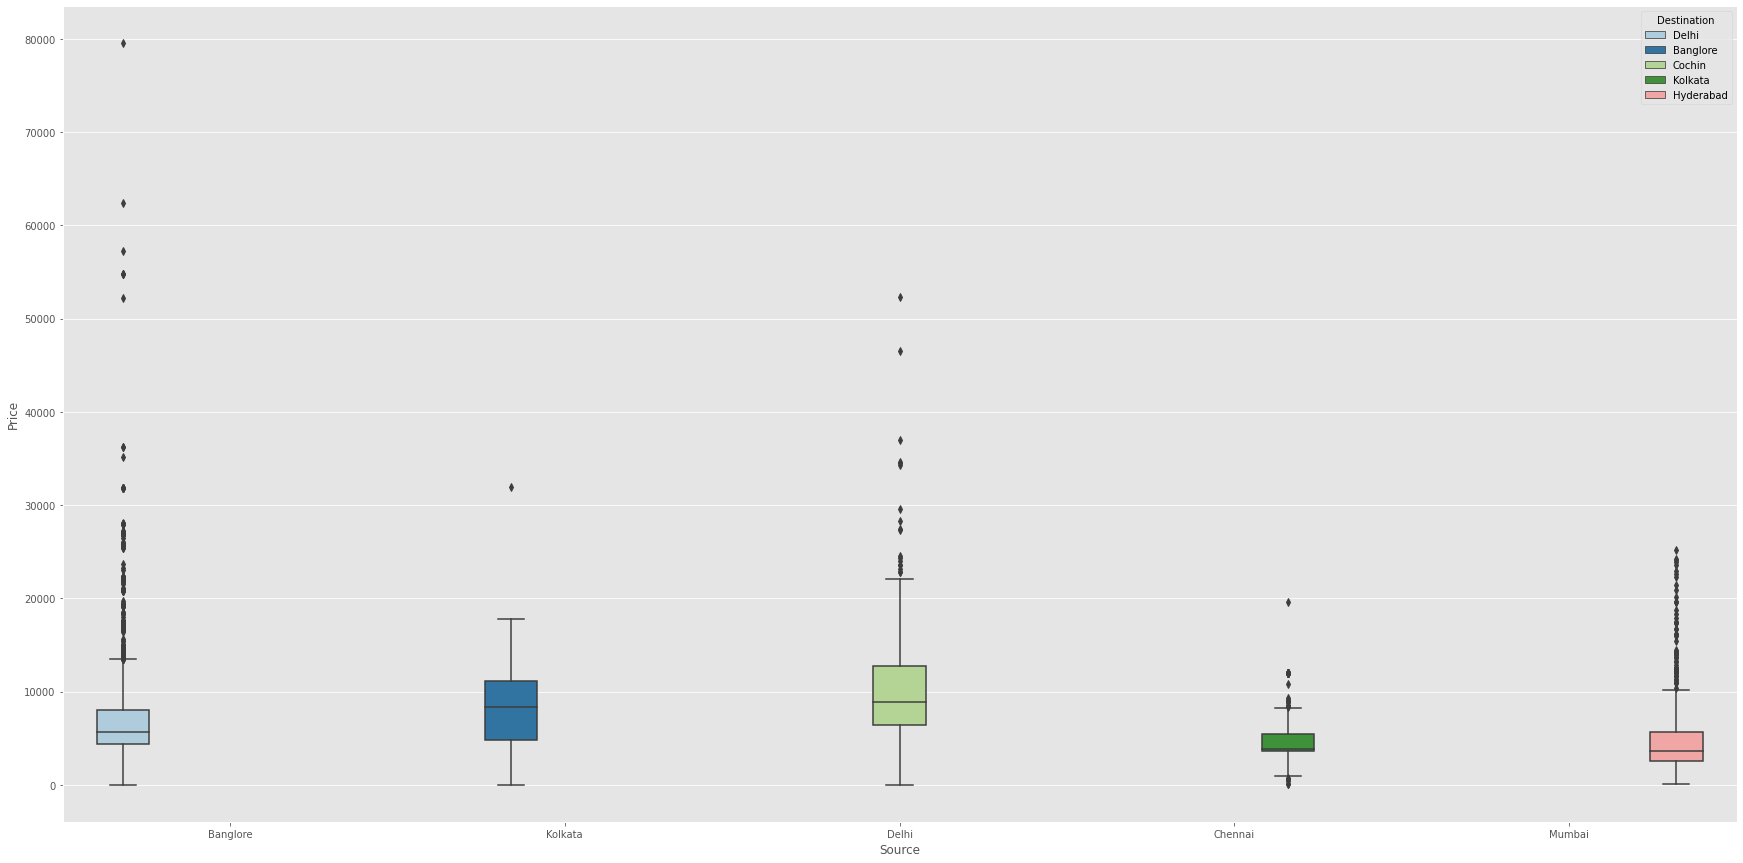

In [59]:
column_name = 'Source'
target = 'Price'
ig, ax = plt.subplots(figsize=(30, 15))
sns.boxplot(ax=ax,
                x=column_name,
                y=target,
                data=df,
                hue = 'Destination',
                palette="Paired");

In [60]:
#המרת עמודת משך טיסה לסוג אינט על מנת ליצור גרף מתאים

In [61]:
df['Minutes Duration'] = df['Minutes Duration'].astype(int)

In [62]:
#ניתן לראות גרף המייצג את ממוצע משך הטיסות עבור כל חברת תעופה 
#ניתן לראות כי ממוצע משך טיסת לחברת אייר אינדיה הינה בעלות הטיסות הארוכות ביותר כאשר ספייגט בעל הטיסות הקצרות ביותר 
# ממצע מעניין שתומך בכך שספייסגט הינה החברה הזולה ביותר מכיוון שהטיסות הכי קצרות
#דוגמא פשוט - טיסות לאילת עם אלעל זולות יותר מטיסות חוץ עם אלעל 

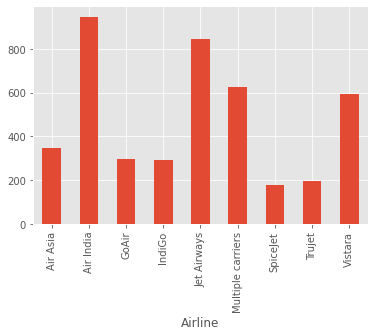

In [63]:
df.groupby('Airline')['Minutes Duration'].mean().plot(kind ='bar');

In [64]:
#מחיקת עמודות הזמן בהתאם לדרישת התרגיל 
#בנוסף מחקתי את עמודת ״מידע נוסף״ מכיוון שלא ראיתי שימוש בו 

In [65]:
drop = ['Dep_Time', 'Arrival_Time', 'Minutes Duration','Additional_Info','day','day week']
df.drop(drop, axis=1, inplace=True)

In [66]:
# לפי דרישת התרגיל נעשה שימוש בלייל-אנקודר על מנת להחליף את חברות התעופה למספרים

In [67]:
le = preprocessing.LabelEncoder()
df['Airline'] = le.fit_transform(df['Airline']) 

In [68]:
#על פי דרישת התרגיל נעשה שימוש בוואן הוט ווקטור בכדי לא לקבל ערכים מספריים על עמודות אלו אלא ערכים בינארים -
#ייתרון: בכך שאנו משתמשים בשיטה זו אנו מוודאים כי לא ניתןם משקל מספרי לעמודה נומינאלית 
# חסרון: בכך שאנו משתמשים בשיטה זו אנו מוסיפים הרבה עמודות במידה ויש הרבה אפשרויות בעמודה דבר היכול לגרום לאוברפיט

In [69]:
df = pd.get_dummies(df, columns=['Source','Destination'])

In [70]:
#על פי דרישת התרגיל נוצרו קבוצות מחירים בהתאם לדרישה 

In [71]:
bins = [0,7000,14000,80000]
label = [1,2,3]
df['Price'] = pd.cut(df['Price'],bins=bins,labels=label,right=True)

In [72]:
# עמודת ה״נתיב״ הינה העמודה המאתגרת ביותר

#הרעיון מאחורי זה היה ליצור עמודה עבור כמות העצירות 
#לאחר יצירת העמודות הבנתי כי בעמודת ״נתיב״ האיבר הראשון והאחרון מיוצגות כבר ב״מוצא״ ו״יעד״ לכן הורדתי אותם
#לאחר מכאן האיברהראשון נשלח לעמודת ״עצירה ראשונה״ ואיבר שני ״עצירה שניה ״ וכן הלאה
# בכך שעשינו זאת גם הפכנו את עמודת הנתיב למספרי וגם הגבלנו את כמות העמודות ל5 (מקסימום עצירות) ומנענו יצירת עמודות נוספות לשווא
#העמודות שלא נעשו בהם שימוש -למשל נתיב בעל עצירה אחת יעשה שימוש רק בעמודת ״עצירה ראשונה״ ובשאר נמלא בערך ״ריק״ 
#לבסוך נעשה שימוש של לייבל אנקודר בשביל להפןךך את הערכים למספרים

In [73]:
#הפיכת עמודת ״נתיב״ ללא מוצא ויעד

In [74]:
df['Route'] = [' '.join(i.split(',')[1:-1]) for i in df['Route']]

In [75]:
# מילוי עמודות חדשות עם הערכים התואמים לעם לפי כל שורה

In [76]:
df['route 1'] = df['Route'].str.split().str[0]
df['route 2'] = df['Route'].str.split().str[1]
df['route 3'] = df['Route'].str.split().str[2]
df['route 4'] = df['Route'].str.split().str[3]

In [77]:
#מכיוון שהמחשב מילא עמודות ריקות בנאלים - הפכתי את זה ליצוג של מילה

In [78]:
df[['route 1','route 2','route 3','route 4']] = df[['route 1','route 2','route 3','route 4']].fillna('N/A')

In [79]:
#מחיקת עמודת נתיב לאחר יצירת עמודות המייצגות אותה

In [80]:
df.drop('Route',axis=1,inplace=True)

In [81]:
#הפיכת עמודות הנתיב עם לייבל אנקודר כמו בעמודת ״חברות תעופה״

In [82]:
le = preprocessing.LabelEncoder()
df['route 1'] = le.fit_transform(df['route 1']) 
df['route 3'] = le.fit_transform(df['route 2']) 
df['route 2'] = le.fit_transform(df['route 3']) 
df['route 4'] = le.fit_transform(df['route 4']) 

In [83]:
#לאחר כלל הפריפרוססינג ניתן לבנות מודל

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
#חלוקת המידע בהתאם לדרישות 

In [86]:
features = df.columns[df.columns != 'Price']
target = 'Price'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [87]:
#בניית מודל קלאסיפיקציה עם 25 עצי החלטה

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
clf = RandomForestClassifier(n_estimators=25)

clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

In [90]:
#תוצאת המודל

In [91]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test, y_predict),3))

0.723


In [92]:
#הצגת מטיצת בלבול

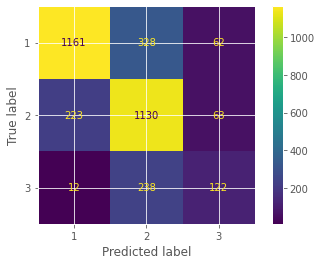

In [93]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test);

In [94]:
#ניתן לראות כי המידע איננו מאוזן 
#לייבל 3 המייצג. מחירים יקרים הינה הקבוצה הקטנה ביותר דבר המשפיע על תוצאת האלגוריתם 
#לדעתי בכדי להעלות את התוצאות נדרש ליצור איזון בין הקבוצות

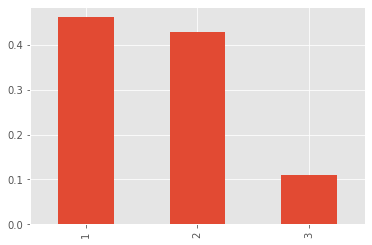

In [95]:
df['Price'].value_counts(normalize=True).plot(kind='bar');

In [96]:
#תוצאות האלגוריתם
#כמנו שהוזכר קודם ניתן לראות כי קבוצת ״3״ מקבלת את התוצאה הנמוכה ביותר ולכן תוצאה כללית נפגעת

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.83      0.75      0.79      1551
           2       0.67      0.80      0.73      1416
           3       0.49      0.33      0.39       372

    accuracy                           0.72      3339
   macro avg       0.66      0.62      0.64      3339
weighted avg       0.72      0.72      0.72      3339



In [98]:
#מכיוון כי המידע לא מאוזן אנו נשתמש בתוצאת f1 
#תוצאה זו מייצגת את האיזון בין ריקול לפרסיזן
#ריקול- ריקול הינה תוצאה של כמות הנכונים שחזיתי נכון מבין התוצאות שלי באותה קבוצה
#פרסיזן- כמו התוצאות האמתיות מכלל הקבוצה

## clustering 

**Question 2**: How many groups can the flights be divided so that each group will have flights that are similar to each other? (airline, route, etc.)

In [99]:
#תהליך דומה נעשה כאן בלאסטרינג
#כלומר ניתקוי נתונים בדיקת ערכים חסרים וייצוג גרפים

In [100]:
#מכיוון שמדובר ברותו הדטה לא נוספו הסברים לכל שלב

In [101]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [102]:
df = data.copy()

In [103]:
#לפי דרישת התרגיל נעשה שימוד בעמודות אלו בלבד

In [104]:
df = df[['Airline','Price','Source','Destination']]

In [105]:
df.isna().sum()

Airline        0
Price          0
Source         0
Destination    0
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 13353
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Airline      13353 non-null  int64  
 1   Price        13353 non-null  float64
 2   Source       13353 non-null  object 
 3   Destination  13353 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [107]:
df.describe()

,Airline,Price
count,13353.000000,13353.000000
mean,3.612746,8190.690501
std,1.798752,4648.571100
min,0.000000,3.065912
25%,3.000000,4804.000000
50%,4.000000,7308.000000
75%,4.000000,11087.000000
max,8.000000,79512.000000


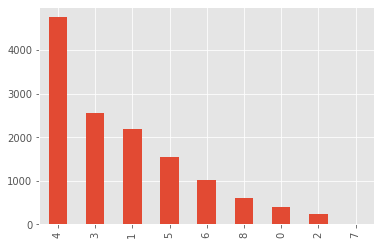

In [108]:
df['Airline'].value_counts().plot(kind = 'bar');

In [109]:
df.loc[df["Airline"] == "Jet Airways Business", 'Airline']='Jet Airways'
df.loc[df["Airline"] == "Multiple carriers Premium economy", 'Airline']='Multiple carriers'
df.loc[df["Airline"] == "Vistara Premium economy", 'Airline']='Vistara'

In [110]:
df["Destination"].value_counts()

Cochin       5681
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [111]:
df.loc[df["Destination"] == "New Delhi", 'Destination']='Delhi'

In [112]:
#שורה זו הינה כדי שאוכל להשתמש בדטה עבור ייצוג הקלאסטר

In [113]:
dfcopy = df.copy()

In [114]:
#ניתן לראות טווח מחירים גדול מאוד ולכן נעשה שימוש בנירמול (לפי דרישת התרגיל) דבר שיעזור כי מדובר
#באלגוריתם מבוסס מרחק

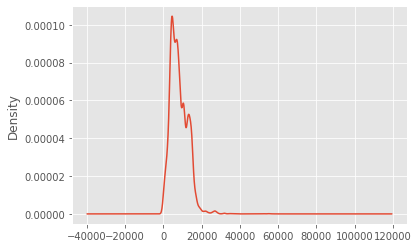

In [115]:
df['Price'].plot(kind = 'kde');

In [116]:
def min_max_scaler(x,min_x,max_x):
     return (x - min_x) / (max_x - min_x)

In [117]:
min_x = df['Price'].min()
max_x = df['Price'].max()
df['Price'] = [min_max_scaler(x,min_x,max_x) for x in df['Price']]

In [118]:
#ניתן לראות כי לאחר נרמול הטווח קטן משמעותית

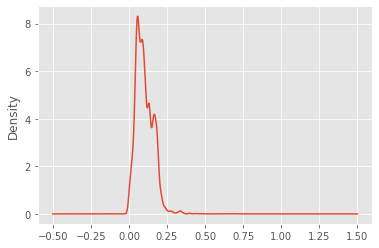

In [119]:
df['Price'].plot(kind = 'kde');

In [120]:
df = pd.get_dummies(df, columns=['Source','Destination','Airline'])

In [121]:
#ניתן לראות כי נעשה שימוש במספר של k

In [122]:
#בקוד למטה עבור כל קיי שונה נשמרו ערך הטעויות וערך סילואט כפי שנדרש
#ערכים אלו יעזרו לנו להחליט איזה קיי מתאים ואופטימלי עבורנו

In [123]:
sse = []
silouette = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)
    score = silhouette_score(df, kmeans.labels_, metric='euclidean')
    silouette.append(score)

In [124]:
#בגרף למטה ניתן לראות (לדעתי)כי הערך האופטימי הינו 3 

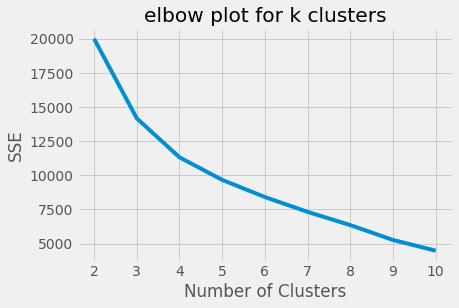

In [125]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sse)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title('elbow plot for k clusters')
plt.show()

In [126]:
#עבוד קיי 3 ניתן לראות את ערך הסילוטא
#ערך הסילואט מייצג לנו את התאימות של כל נקודה בקלאסטר אל מול הלאסטר שלו ובנוסף את השוני שלו מקלאסטרים אחרים 
#כלומר נלקחים (אם הבנתי נכון) אנו נחשב את 2 הערים האלו עבור כל נקודה ונקודה בכל קלאסר וניקח את הממוצע שלו

## from the plot above we can observe that the optimal k is 3-4 clusters. 

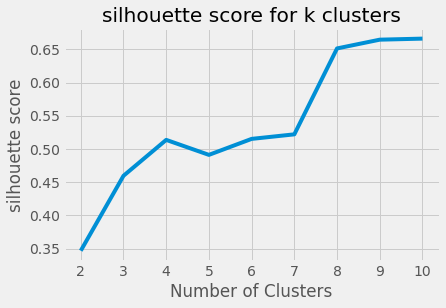

In [127]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silouette)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette score")
plt.title('silhouette score for k clusters')
plt.show()

In [128]:
#לאחר בחירת קיי אני מייצר אלגו בהתאם ומוסיף לדטה המקורי את הקלסטר שנבחר עבור כל שורה

In [129]:
kmeans_3 = KMeans(n_clusters=3,random_state=42)
kmeans_3.fit(df)

KMeans(n_clusters=3, random_state=42)

In [130]:
label = kmeans_3.labels_

In [131]:
dfcopy['cluster'] = label

In [132]:
#הסיבה היא כדי לנסות להבין איך הקלאסטרים אלו חולקו ומה העמודות שגרמנו לכך

In [133]:
#ניתן לראות חפיפה גדולה מאוד בין הקלאסטרים כאשר מחלקים על פי חברות התעוםה

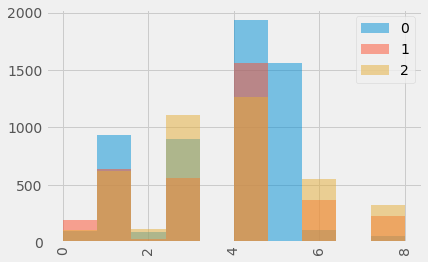

In [134]:
dfcopy.groupby('cluster')['Airline'].hist(legend=True,alpha=0.5)
plt.xticks(rotation = 90);

In [135]:
#דבר דומה ניתן לראות עבור המחירים 
#לפי גרף זה נראה כי אלו לא העמודות בהם חולקו 

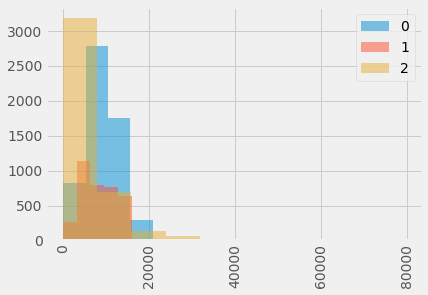

In [136]:
dfcopy.groupby('cluster')['Price'].hist(legend=True,alpha=0.5)
plt.xticks(rotation = 90);

In [137]:
#נראה כי ישנה חלוקה דיי ברוה של קלאסטרים בהתאם ליעד והמוצא 
#לכן נראה כי חלוקה על פי מוצא ויעד הינה חלוקה טובה 

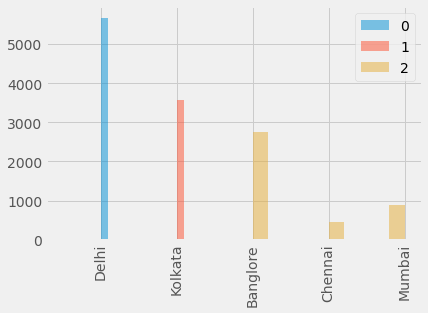

In [138]:
dfcopy.groupby('cluster')['Source'].hist(legend=True,alpha=0.5)
plt.xticks(rotation = 90);

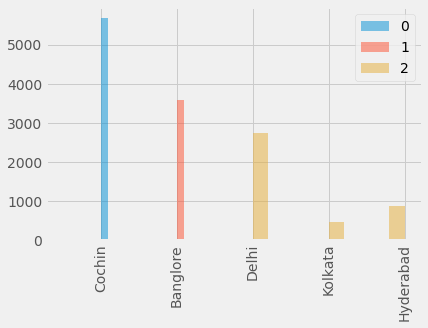

In [139]:
dfcopy.groupby('cluster')['Destination'].hist(legend=True,alpha=0.5)
plt.xticks(rotation = 90);